# Volcano plot
- mode: HILICpos

In [44]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
# options(warn=-1)

In [45]:
# Load packages
library(dplyr)
library(ggplot2)

# Install ggrepel package if needed
# install.packages("devtools")
# devtools::install_github("slowkow/ggrepel")
library(ggrepel) #To be able to make ggplot without overlapping labeling
library(glue)

In [46]:
# Read data from the web
res_file_name = "../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv"
annot_file_name = "../../../input/HILICpos_mzML/output_asari_project_224113827_targeted_search/simp-m-targeted_extraction-Feature_table.tsv"
res_df = read.table(res_file_name, row.names = 1,header=TRUE, sep = ',')
annot_df = read.table(annot_file_name,sep = '\t', header = TRUE)

In [47]:
head(res_df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10769,372.7447,25.17,23.59,28.32,9930,2649961,1,0.99,456,5,0.3333333,607321,0,814311.7,1.0000000,NA,18.87393,19.87924,18.18448,1.00530733,-0.689451593,-1.6947589,10.665303620,0.010580493,0.04520756,0.07683568,0.2276851,0.008865051,0.24476873,0.6820729,0.03787795,19.18448,19.25283,18.18448,19.42996,20.42619,19.78156,18.18448,18.18448,18.18448,NA,NA,NA
F11541,384.7631,38.83,36.20,41.72,10150,748661750,1,0.97,86549,22,0.0000000,38240480,0,15914575.0,0.0000000,51969739,25.08034,24.22063,25.29502,-0.85970886,0.214678350,1.0743872,14.781111902,0.004802717,0.02508086,0.01480787,0.5886961,0.005142230,0.09942426,0.8646473,0.02420651,25.47994,24.98491,24.77617,24.17855,24.45577,24.02758,25.23576,25.45258,25.19671,25.99780,25.03423,25.0114
F13199,548.3007,24.64,22.28,27.79,12591,124579197,1,0.87,7880,13,0.0000000,18878581,0,14459066.7,0.0000000,24287771,24.06018,24.08319,24.05723,0.02300941,-0.002942386,-0.0259518,0.001440125,0.998561256,0.99856126,0.99895988,0.9999830,0.998677101,0.99895988,1.0000000,0.99867710,24.08338,24.45670,23.64044,24.37743,23.83728,24.03485,22.91200,24.82122,24.43848,16.85336,NA,NA
F13675,557.3588,25.43,23.59,28.32,12697,4217228,1,0.97,587,6,1.0000000,NA,0,1002160.7,0.3333333,1337436,18.72961,20.24748,19.62756,1.51786475,0.897943497,-0.6199213,7.103773875,0.026176580,0.05672360,0.02224461,0.1463886,0.342844709,0.13068706,0.6520000,0.40284253,18.72961,18.72961,18.72961,20.27951,20.12174,20.34119,18.72961,19.72961,20.42344,NA,NA,NA
F13861,486.2846,25.95,24.38,28.84,11788,3788049,1,0.84,363,5,0.6666667,610026,0,1308415.7,0.6666667,1049975,18.55184,20.54879,18.73663,1.99694951,0.184788115,-1.8121614,7.055995090,0.026551472,0.05672360,0.03347616,0.9473926,0.049005113,0.17481994,1.0000000,0.09212961,18.21851,19.21851,18.21851,19.84244,20.70139,21.10255,18.21851,19.77288,18.21851,NA,NA,NA
F14458,571.3745,25.69,23.59,28.84,12860,57656484,1,0.89,6250,12,0.0000000,6641773,0,6248091.5,0.0000000,9920116,22.52329,22.87460,22.89693,0.35131175,0.373643249,0.0223315,1.243703167,0.353287904,0.38615189,0.43481961,0.3959534,0.996117395,0.65924263,0.7443924,0.99867710,22.18899,22.59417,22.78670,22.89830,23.05746,22.66804,22.39844,23.13912,23.15323,NA,NA,NA


In [48]:
head(annot_df)

,id_number,query_target,Species.Shorthand,Formula,adduct_type,id_number.1,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,nist_1,G1_Naive_1_300_1,G1_Naive_2_300_1,G1_Naive_3_300_1,G2_R5pos_1_142_1,G2_R5pos_2_200_1,G2_R5pos_3_150_1,G3_R5neg_1a_655_1,G3_R5neg_1b_655_1,G3_R5neg_2a_687_1,G3_R5neg_2b_687_1,G3_R5neg_3a_865_1,G3_R5neg_3b_865_1,nist_3,nist_5,q3June2014_1b_1,q3June2014_1b_3,q3June2014_1b_5,q3June2014_2a_1,q3June2014_2a_3,q3June2014_2a_5,q3June2014_2b_1,q3June2014_2b_3,q3June2014_2b_5
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,F8342,285.6450,LPS 22:6,569.2754,M+2H[2+],F8342,285.6449,24.12,22.01,25.43,7803,8354554,1.00,0.87,1671,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1880316,1898032,2087381,2028266,1400488,1438950,1530588,1802440,1358006
2,F8901,289.6763,LPS 22:2,577.3380,M+2H[2+],F8901,289.6775,28.84,28.06,30.16,7939,15049385,1.00,0.88,3480,1,15058385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,F10769,372.7441,PS 33:3,743.4737,M+2H[2+],F10769,372.7447,25.17,23.59,28.32,9930,2649961,1.00,0.99,456,5,0,589929,624713,0,0,0,0,0,568664,1175476,0,0,698795,0,0,0,0,0,0,0,0,0,0,0
4,F11347,380.7598,PS 34:2,759.5050,M+2H[2+],F11347,380.7611,40.93,40.41,42.77,10096,3886624,0.36,0.76,46,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955231,0,0,694556,652651,772866,0,775396,383544
5,F11353,380.7780,PS O-35:2,759.5414,M+2H[2+],F11353,380.7779,88.75,86.65,91.90,10098,3682742,0.83,0.65,140,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24566,654880,471393,1098206,0,544060,0,0,868383,0
6,F11541,384.7623,PS O-36:5,767.5101,M+2H[2+],F11541,384.7631,38.83,36.20,41.72,10150,748661750,1.00,0.97,86549,22,65578236,46336443,33205361,35179635,56806678,53819588,45282951,15286973,0,16071297,22323135,0,13259536,66048384,69392814,33692448,33939957,35447573,34704157,33474863,33362928,34226621,32295323,34860102


In [49]:
id_annot = annot_df[['id_number']]
names(id_annot) = annot_df[['Species.Shorthand']]

In [50]:
id_annot

LPS 22:6     LPS 22:2      PS 33:3      PS 34:2    PS O-35:2    PS O-36:5 
     "F8342"      "F8901"     "F10769"     "F11347"     "F11353"     "F11541" 
     PS 35:3    PS O-37:2      PS 37:7      PS 37:5      PS 37:4      PS 39:6 
    "F11651"     "F12286"     "F12379"     "F12486"     "F12638"     "F12736" 
     PS 40:2      PS 41:7      PS 41:5    PS O-42:3      PS 41:1 LPS O-15:0;O 
    "F13790"     "F13956"     "F14067"     "F14194"     "F14396"     "F13861" 
  LPS O-18:1   LPS O-18:0 LPS O-17:0;O   LPS O-20:1   LPS O-20:0     LPS 20:4 
    "F14294"     "F14399"     "F15644"     "F16093"     "F16251"     "F16648" 
  LPS O-18:0     LPS 19:1   LPS O-20:0     LPS 20:3 LPS O-19:1;O     LPS 19:0 
    "F12475"     "F12682"     "F12754"     "F13199"     "F13675"     "F13675" 
    LPS 20:0     LPS 22:6      PS 26:1 LPS O-28:1;O    PS O-28:0 LPS O-27:2;O 
    "F14458"     "F15219"     "F13971"     "F14782"     "F14782"     "F14898" 
     PS 28:0    PS O-28:1      PS 29:1      PS 28:2    PS O-28:1    PS O-28:1 
    "F15374"     "F15464"     "F15866"     "F15955"     "F16158"     "F16361" 
     PS 28:2 LPS O-29:1;O    PS O-29:0    PS O-32:0    PS O-30:1    PS O-33:1 
    "F16805"     "F16948"     "F16948"     "F16582"     "F16821"     "F17082" 
   PS O-33:0    PS O-34:1      PS 33:0    PS O-34:0    PS O-35:3    PS O-35:2 
    "F17116"     "F17342"     "F17371"     "F17374"     "F17508"     "F17537" 
   PS O-35:1      PS 32:4    PS O-34:2    PS O-35:0      PS 33:0    PS O-33:3 
    "F17581"     "F17603"     "F17617"     "F17621"     "F17665"     "F17699" 
   PS O-36:3      PS 35:2    PS O-36:2    PS O-36:1      PS 34:2    PS O-36:0 
    "F17744"     "F17781"     "F17785"     "F17828"     "F17848"     "F17855" 
     PS 34:0    PS O-37:3      PS 34:6    PS O-34:1      PS 36:2    PS O-37:2 
    "F17923"     "F18007"     "F18022"     "F18049"     "F18050"     "F18058" 
   PS O-34:0    PS O-37:1      PS 37:7      PS 35:2      PS 36:0      PS 34:5 
    "F18083"     "F18087"     "F18117"     "F18127"     "F18133"     "F18169" 
     PS 37:6    PS O-38:5    PS O-35:3    PS O-38:4    PS O-38:3      PS 38:9 
    "F18173"     "F18214"     "F18252"     "F18258"     "F18314"     "F18334" 
   PS O-38:2    PS O-38:1      PS 36:2    PS O-38:0      PS 35:5      PS 36:1 
    "F18343"     "F18388"     "F18429"     "F18441"     "F18462"     "F18473" 
   PS O-36:2      PS 36:6    PS O-36:1    PS O-39:2    PS O-36:0      PS 36:4 
    "F18625"     "F18656"     "F18685"     "F18689"     "F18720"     "F18740" 
     PS 39:7      PS 38:0      PS 36:4      PS 39:5    PS O-40:5    PS O-40:4 
    "F18751"     "F18756"     "F18816"     "F18818"     "F18825"     "F18849" 
     PS 38:5    PS O-40:3      PS 36:1    PS O-40:2      PS 36:0    PS O-40:1 
    "F18860"     "F18863"     "F18893"     "F18900"     "F16890"     "F16904" 
     PS 37:6      PS 40:7      PS 38:2    PS O-38:3      PS 40:4    PS O-38:2 
    "F16950"     "F16956"     "F16966"     "F17118"     "F17119"     "F17191" 
     PS 39:4    PS O-38:1      PS 40:2    PS O-38:0    PS O-42:7      PS 39:2 
    "F17223"     "F17226"     "F17228"     "F17300"     "F17328"     "F17333" 
   PS O-42:6    PS O-42:5      PS 38:3    PS O-42:4      PS 38:2    PS O-42:3 
    "F17358"     "F17379"     "F17415"     "F17417"     "F17438"     "F17442" 
     PS 41:2      PS 38:0    PS O-40:4    PS O-42:7      PS 40:6      PS 41:1 
    "F17460"     "F17484"     "F17555"     "F17558"     "F17672"     "F17705" 
   PS O-42:1     PS 44:12      PS 43:1      PS 43:6 
    "F17706"     "F17876"     "F17943"     "F18006"

-------

-------

-------

## Create output directory

In [51]:
out_dir = "../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/volcano_plot/"
dir.create(out_dir)

Warning message in dir.create(out_dir):
“'../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/volcano_plot' already exists”


In [52]:
head(res_df,2)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10769,372.7447,25.17,23.59,28.32,9930,2649961,1,0.99,456,5,0.3333333,607321,0,814311.7,1,NA,18.87393,19.87924,18.18448,1.0053073,-0.6894516,-1.694759,10.66530,0.010580493,0.04520756,0.07683568,0.2276851,0.008865051,0.24476873,0.6820729,0.03787795,19.18448,19.25283,18.18448,19.42996,20.42619,19.78156,18.18448,18.18448,18.18448,NA,NA,NA
F11541,384.7631,38.83,36.20,41.72,10150,748661750,1,0.97,86549,22,0.0000000,38240480,0,15914575.0,0,51969739,25.08034,24.22063,25.29502,-0.8597089,0.2146783,1.074387,14.78111,0.004802717,0.02508086,0.01480787,0.5886961,0.005142230,0.09942426,0.8646473,0.02420651,25.47994,24.98491,24.77617,24.17855,24.45577,24.02758,25.23576,25.45258,25.19671,25.9978,25.03423,25.0114


------

------

------

# Volcano plot function

In [53]:
volcano_plot <- function(res_df = res_df,
                            padj_colname = padj_colname,
                            log2FC_colname = log2FC_colname,
                            p_cut_off = p_cut_off,
                            log2FC_cut_off = log2FC_cut_off,
                            xlab = xlab,
                            ylab = 'log10(FDR)',
                            xlim = xlim,
                            ylim = ylim,
                            highlight_text = FALSE,
                            fig_width = 8,
                            fig_height = 8,
                            text_size = 20,
                            legend_size = 20,
                            axis_title_size = 20,
                            output_dir = "",
                            pdf_prefix = 'test',
                            show_plot = TRUE) {
    
    colnames(res_df)
    res_df = mutate(res_df, 
                     Label = ifelse((res_df[,padj_colname] < p_cut_off) & (abs(res_df[,log2FC_colname]) > 1),  # Label is the column that distinguish the coloring
                                  "Significant", 
                                  "Not Sign.")) #mutate is a good function 

    res_df$log10padj = -log(res_df[,padj_colname],10)
    print(paste0("range of log10padj: ", range(res_df$log10padj),'\n', "range of log2FC: ", range(res_df$log2FC)))
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)
    
    hist(res_df[,log2FC_colname], breaks =30)
    
    p = ggplot( res_df, 
                aes_string(log2FC_colname,"log10padj")) +
                geom_point(aes(col=Label), alpha = 0.5) +
                scale_color_manual(values=c("#888888","#ff0000")) +
                xlim(xlim) + 
                ylim(ylim) + 
                xlab(xlab) +
                ylab(ylab) +
                
                theme(
                      panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
                      panel.border = element_rect(fill = NA),
                      #panel.grid.minor = element_blank(),
                      panel.background = element_rect(fill = "transparent",colour = NA),
                      plot.background = element_rect(fill = "transparent",colour = NA),
                      axis.text = element_text(size = text_size, colour="black"),
                      axis.text.x = element_text(colour="black"),
                      legend.text= element_text(size = legend_size),
                      legend.title = element_text(size = legend_size),
                      axis.title = element_text(size = axis_title_size)
                    )
    if(highlight_text == TRUE) {
        print("With highlighted text")
        p = p + geom_text_repel(data = filter(res_df, highlight != ""), 
                                aes(label = highlight),
                                max.overlaps = Inf)
    }
    
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, 
                             glue("volcano_plot_",
                                                pdf_prefix,".pdf")), 
                   width = fig_width, 
                   height = fig_height)
        }
}

# Volcano plot
## log2FC R5pos vs R5neg

In [54]:
padj_colname = 'TFDR_R5pos.R5neg'
log2FC_colname = 'log2FC_R5posvsR5neg'
contrast = "R5pos vs. R5neg"

### No highlight

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0.000574908040871887\nrange of log2FC: Inf"
[2] "range of log10padj: 3.77707368710817\nrange of log2FC: -Inf"   


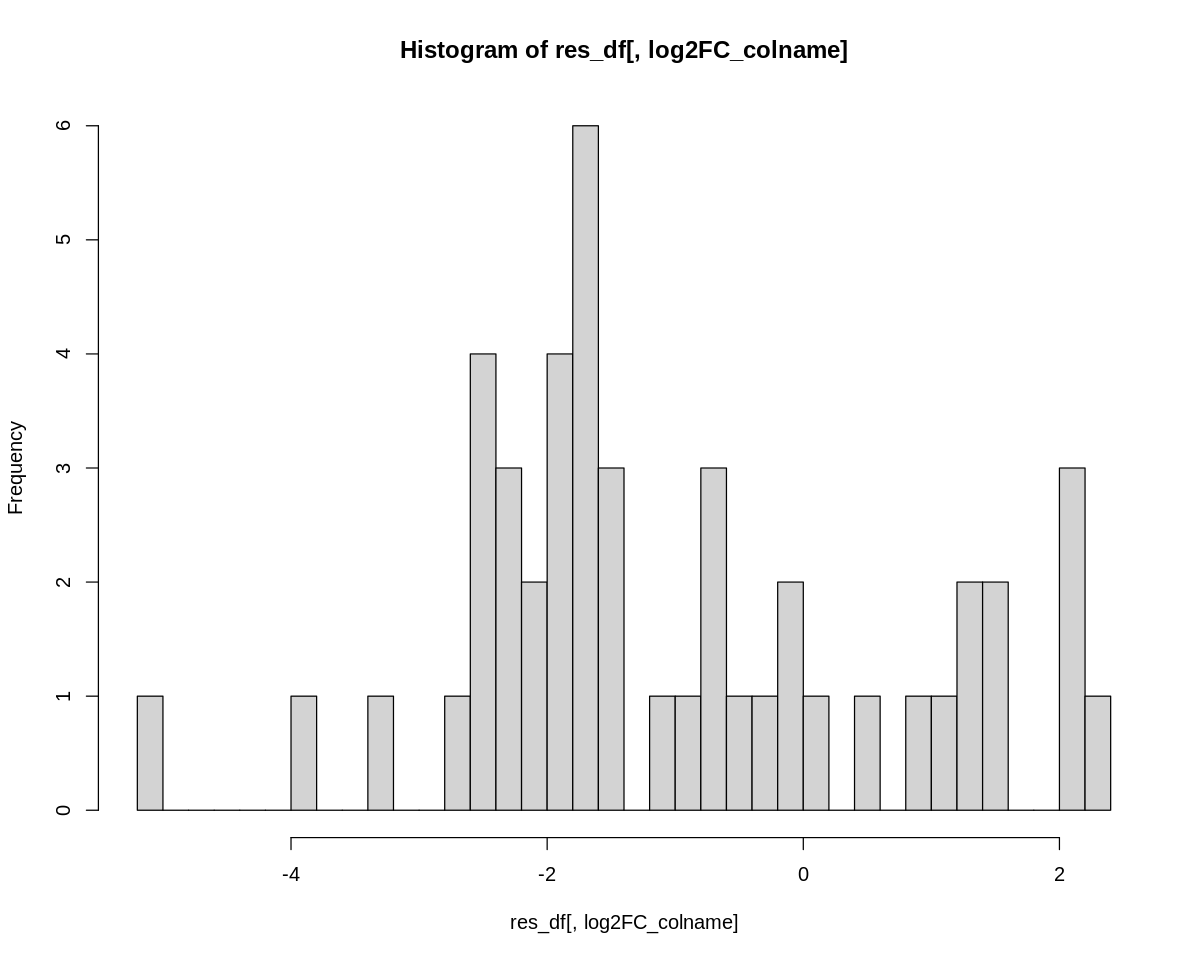

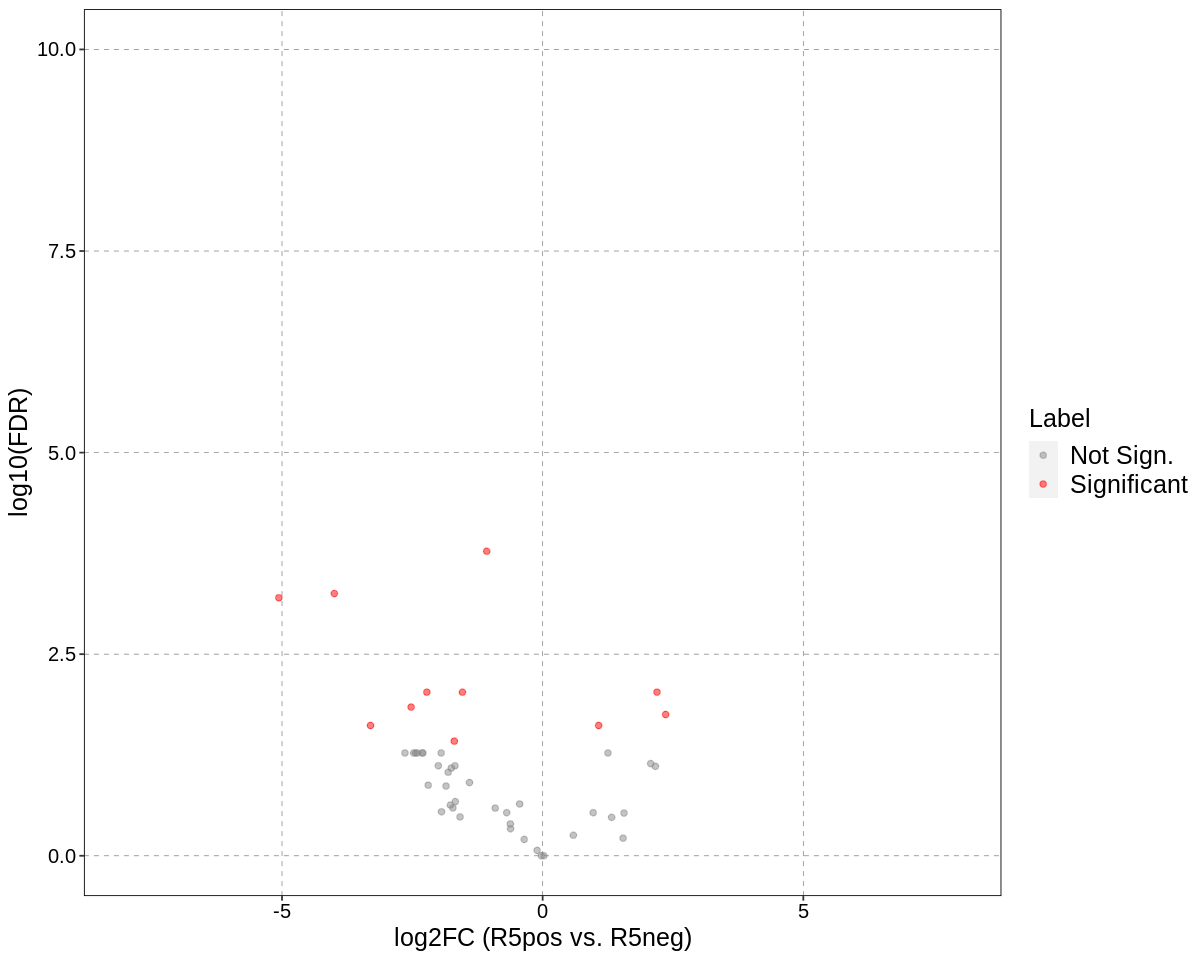

In [55]:
volcano_plot(res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight = FALSE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('{contrast}'),
                show_plot = TRUE)

## With highlight

### Select parameters for highlight

In [56]:
res_df$highlight = names(id_annot[match(rownames(res_df),id_annot)]) # find the PS species names

unique(res_df$highlight)

[1] "PS 33:3"      "PS O-36:5"    "LPS 20:3"     "LPS O-19:1;O" "LPS O-15:0;O"
 [6] "LPS 20:0"     "LPS O-28:1;O" "PS O-28:1"    "LPS O-17:0;O" "PS 40:7"     
[11] "PS O-33:1"    "PS 33:0"      "PS O-34:0"    "PS O-42:5"    "PS O-42:4"   
[16] "PS O-42:3"    "PS 41:2"      "PS O-35:3"    "PS O-35:1"    "PS O-34:2"   
[21] "PS O-35:0"    "PS 40:6"      "PS O-36:2"    "PS O-36:1"    "PS O-36:0"   
[26] "PS 44:12"     "PS 34:0"      "PS O-37:3"    "PS 34:5"      "PS O-38:4"   
[31] "PS O-38:3"    "PS O-38:2"    "PS O-38:1"    "PS 36:2"      "PS 35:5"     
[36] "PS 36:1"      "PS 36:6"      "PS 39:7"      "PS 36:4"      "PS O-40:5"   
[41] "PS O-40:4"    "PS 38:5"      "PS O-40:3"    "PS O-40:2"

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0.000574908040871887\nrange of log2FC: Inf"
[2] "range of log10padj: 3.77707368710817\nrange of log2FC: -Inf"   
[1] "With highlighted text"


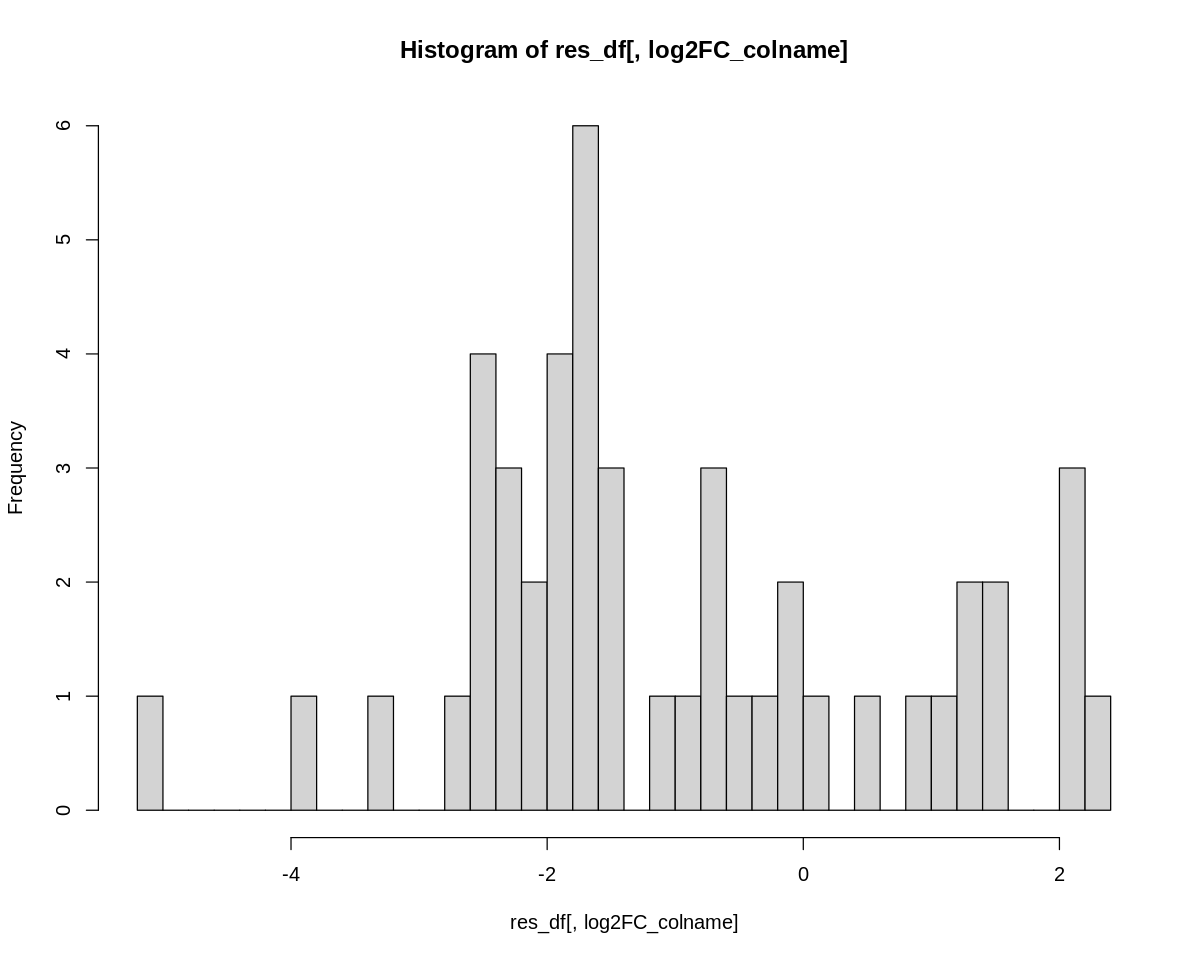

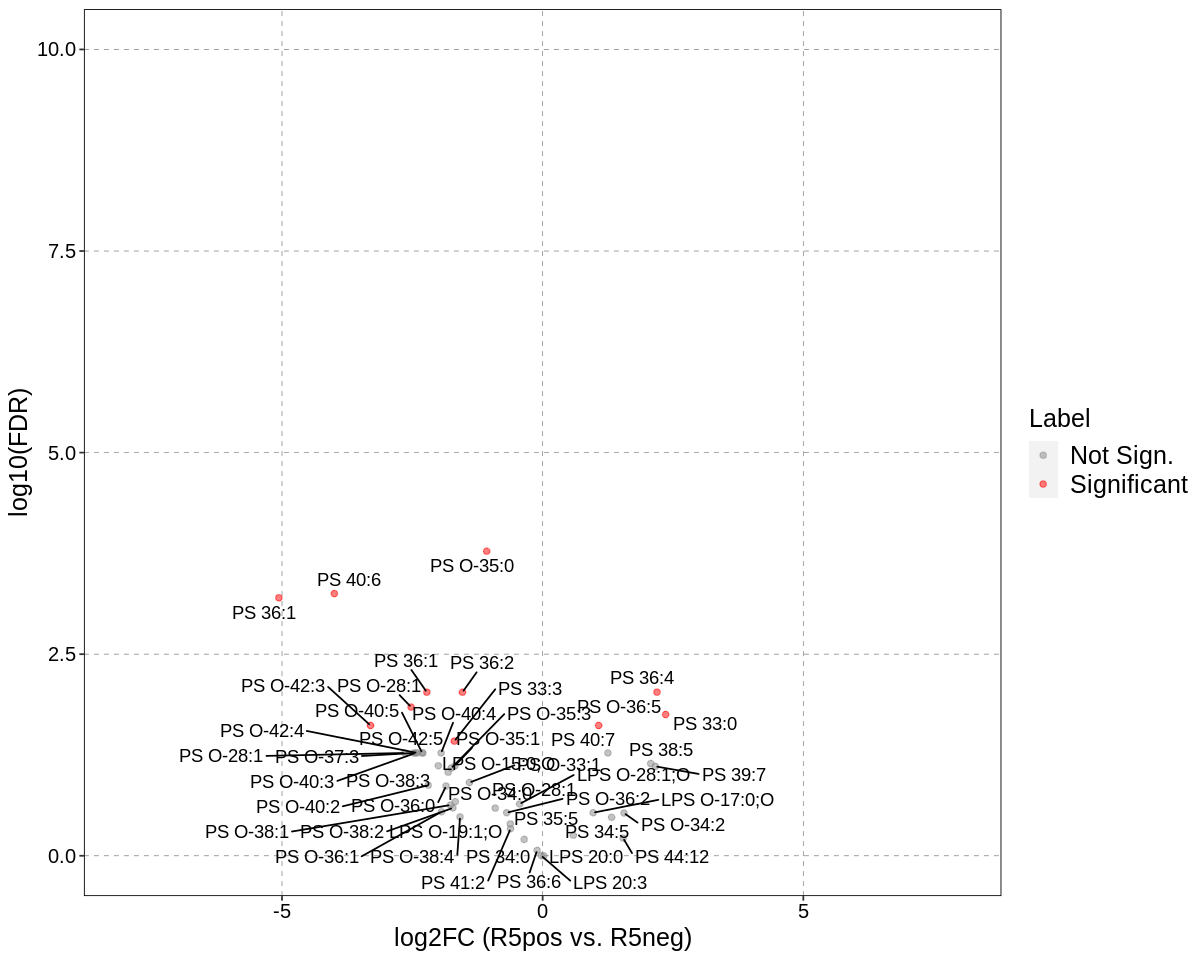

In [57]:
volcano_plot(   res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight_text = TRUE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('{contrast}_with_highlight{topN}'),
                show_plot = TRUE)

--------

------

# Volcano plot
## log2FC R5pos vs Naive

In [58]:
padj_colname = 'TFDR_R5pos.Naive'
log2FC_colname = 'log2FC_R5posvsNaive'
contrast = "R5pos vs. Naive"

### without highlight

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"               
[2] "range of log10padj: 1.6003231766297\nrange of log2FC: -Inf"


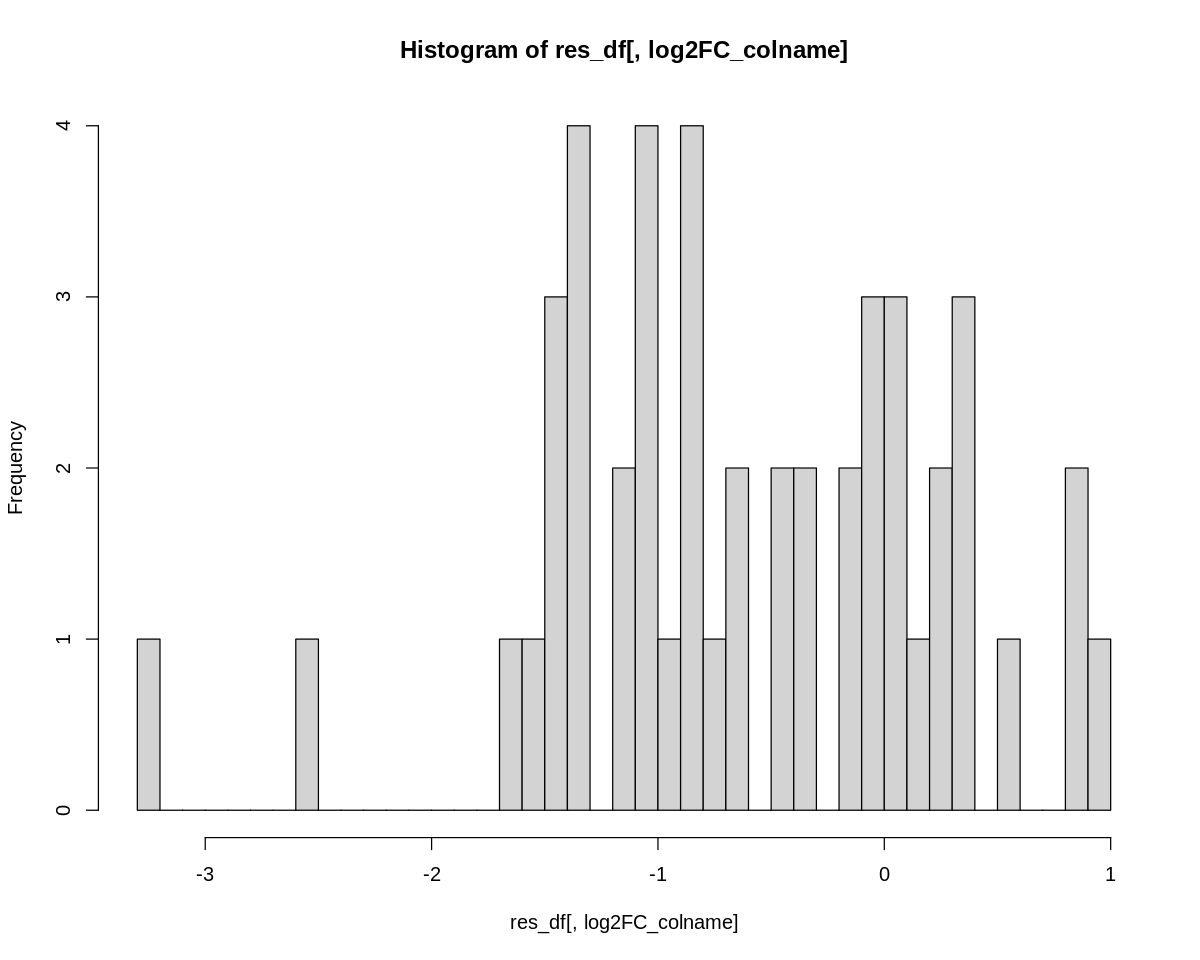

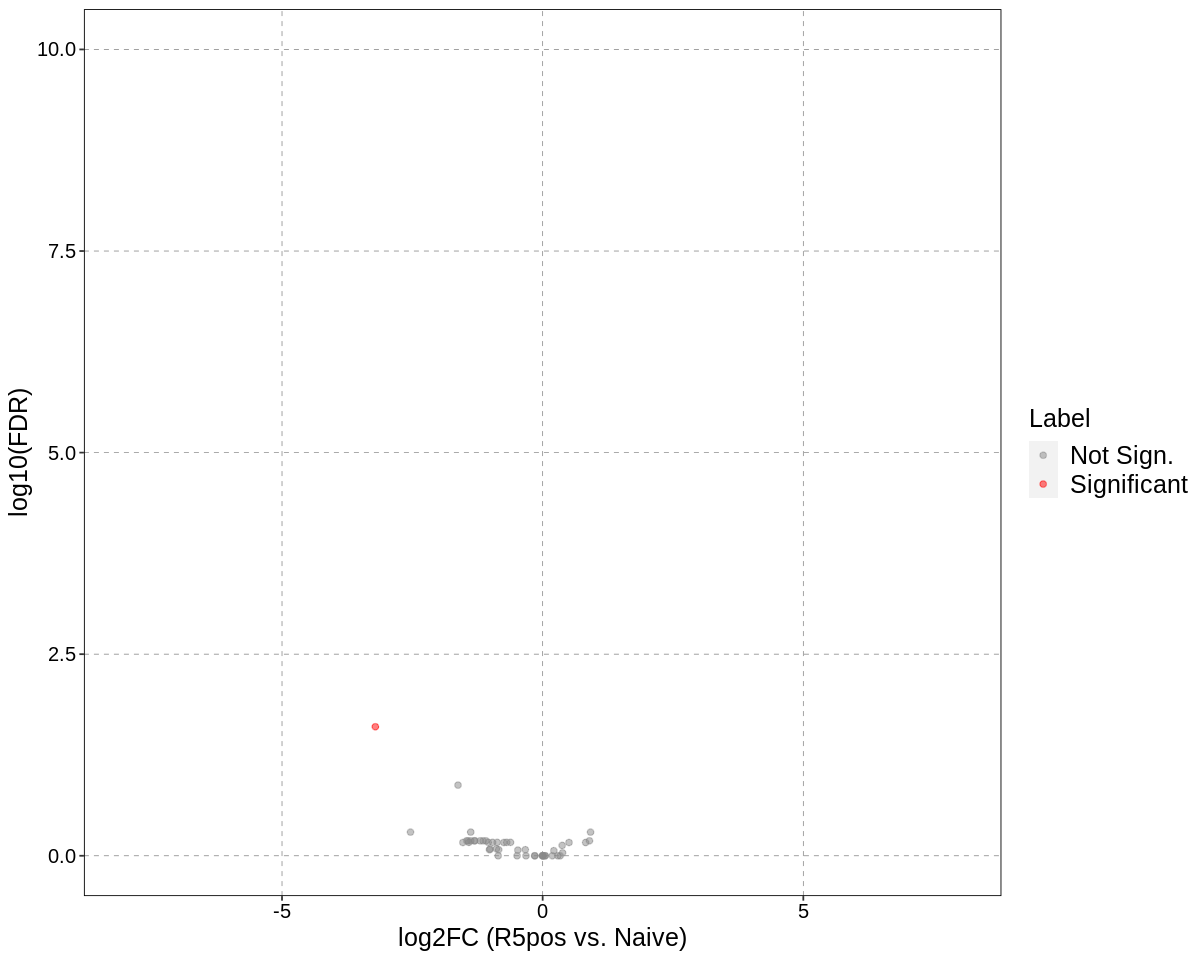

In [59]:
volcano_plot(res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight = FALSE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = contrast,
                show_plot = TRUE)

### with highlight

### select parameters for highlight

In [60]:
res_df$highlight = names(id_annot[match(rownames(res_df),id_annot)]) # find the PS species names

unique(res_df$highlight)

[1] "PS 33:3"      "PS O-36:5"    "LPS 20:3"     "LPS O-19:1;O" "LPS O-15:0;O"
 [6] "LPS 20:0"     "LPS O-28:1;O" "PS O-28:1"    "LPS O-17:0;O" "PS 40:7"     
[11] "PS O-33:1"    "PS 33:0"      "PS O-34:0"    "PS O-42:5"    "PS O-42:4"   
[16] "PS O-42:3"    "PS 41:2"      "PS O-35:3"    "PS O-35:1"    "PS O-34:2"   
[21] "PS O-35:0"    "PS 40:6"      "PS O-36:2"    "PS O-36:1"    "PS O-36:0"   
[26] "PS 44:12"     "PS 34:0"      "PS O-37:3"    "PS 34:5"      "PS O-38:4"   
[31] "PS O-38:3"    "PS O-38:2"    "PS O-38:1"    "PS 36:2"      "PS 35:5"     
[36] "PS 36:1"      "PS 36:6"      "PS 39:7"      "PS 36:4"      "PS O-40:5"   
[41] "PS O-40:4"    "PS 38:5"      "PS O-40:3"    "PS O-40:2"

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0\nrange of log2FC: Inf"               
[2] "range of log10padj: 1.6003231766297\nrange of log2FC: -Inf"
[1] "With highlighted text"


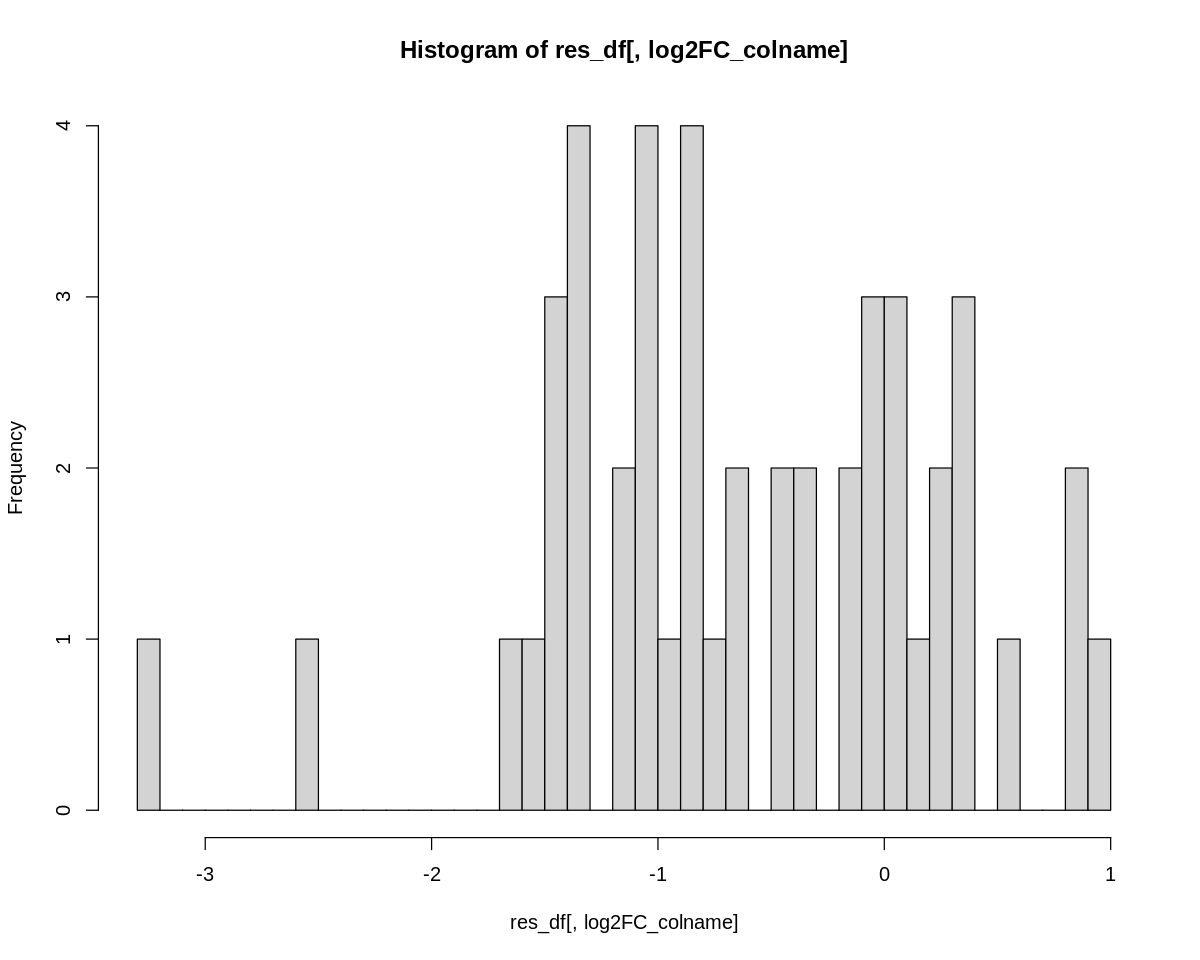

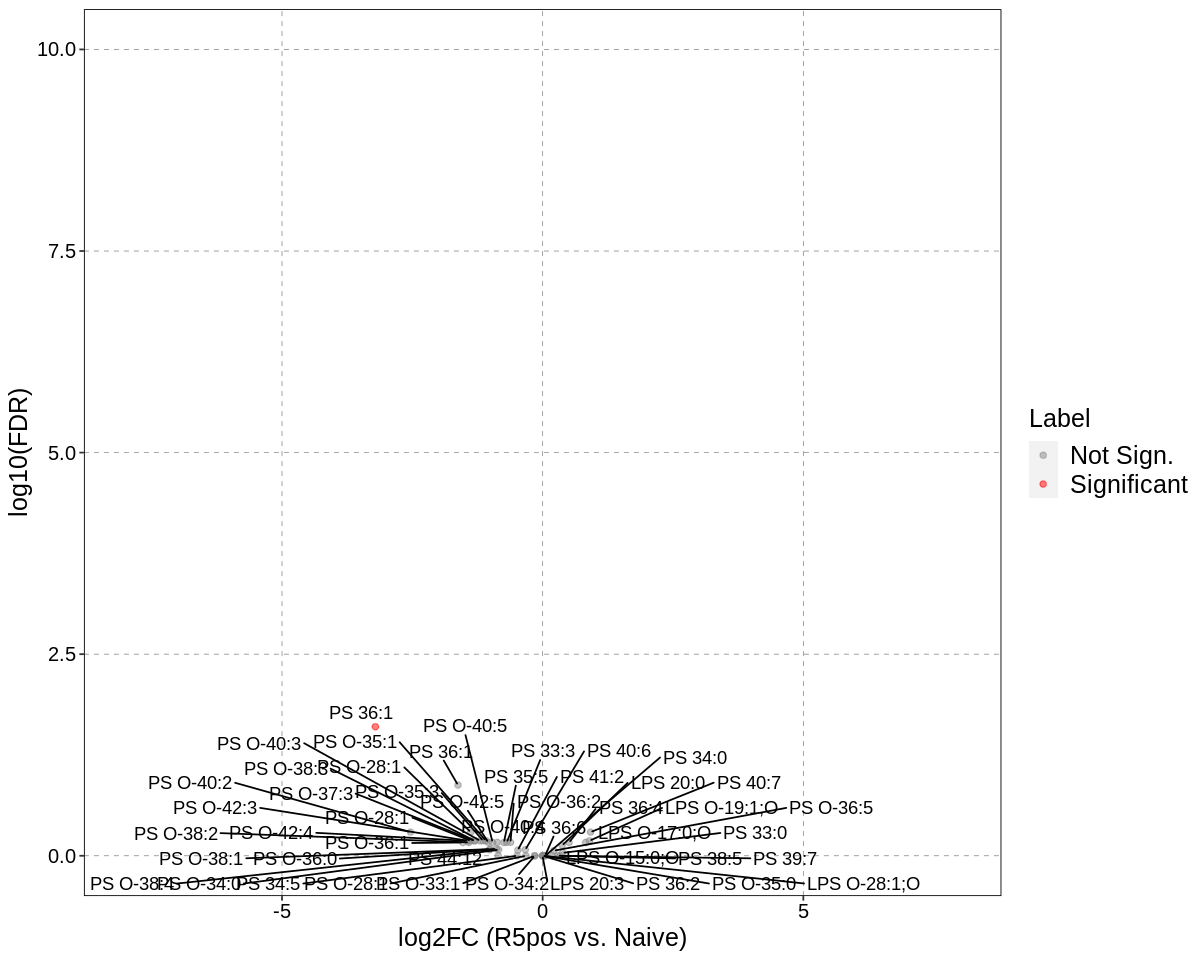

In [61]:
volcano_plot(   res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight_text = TRUE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('{contrast}_with_highlight{topN}'),
                show_plot = TRUE)

-----

-----

-----

-----

# Volcano plot
## log2FC R5neg vs Naive

In [62]:
padj_colname = 'TFDR_R5neg.Naive'
log2FC_colname = 'log2FC_R5negvsNaive'
contrast = "R5neg vs. Naive"

In [63]:
res_df$highlight = names(id_annot[match(rownames(res_df),id_annot)]) # find the PS species names

unique(res_df$highlight)

[1] "PS 33:3"      "PS O-36:5"    "LPS 20:3"     "LPS O-19:1;O" "LPS O-15:0;O"
 [6] "LPS 20:0"     "LPS O-28:1;O" "PS O-28:1"    "LPS O-17:0;O" "PS 40:7"     
[11] "PS O-33:1"    "PS 33:0"      "PS O-34:0"    "PS O-42:5"    "PS O-42:4"   
[16] "PS O-42:3"    "PS 41:2"      "PS O-35:3"    "PS O-35:1"    "PS O-34:2"   
[21] "PS O-35:0"    "PS 40:6"      "PS O-36:2"    "PS O-36:1"    "PS O-36:0"   
[26] "PS 44:12"     "PS 34:0"      "PS O-37:3"    "PS 34:5"      "PS O-38:4"   
[31] "PS O-38:3"    "PS O-38:2"    "PS O-38:1"    "PS 36:2"      "PS 35:5"     
[36] "PS 36:1"      "PS 36:6"      "PS 39:7"      "PS 36:4"      "PS O-40:5"   
[41] "PS O-40:4"    "PS 38:5"      "PS O-40:3"    "PS O-40:2"

### without highlight

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0.000451955460768076\nrange of log2FC: Inf"
[2] "range of log10padj: 3.77707368710817\nrange of log2FC: -Inf"   


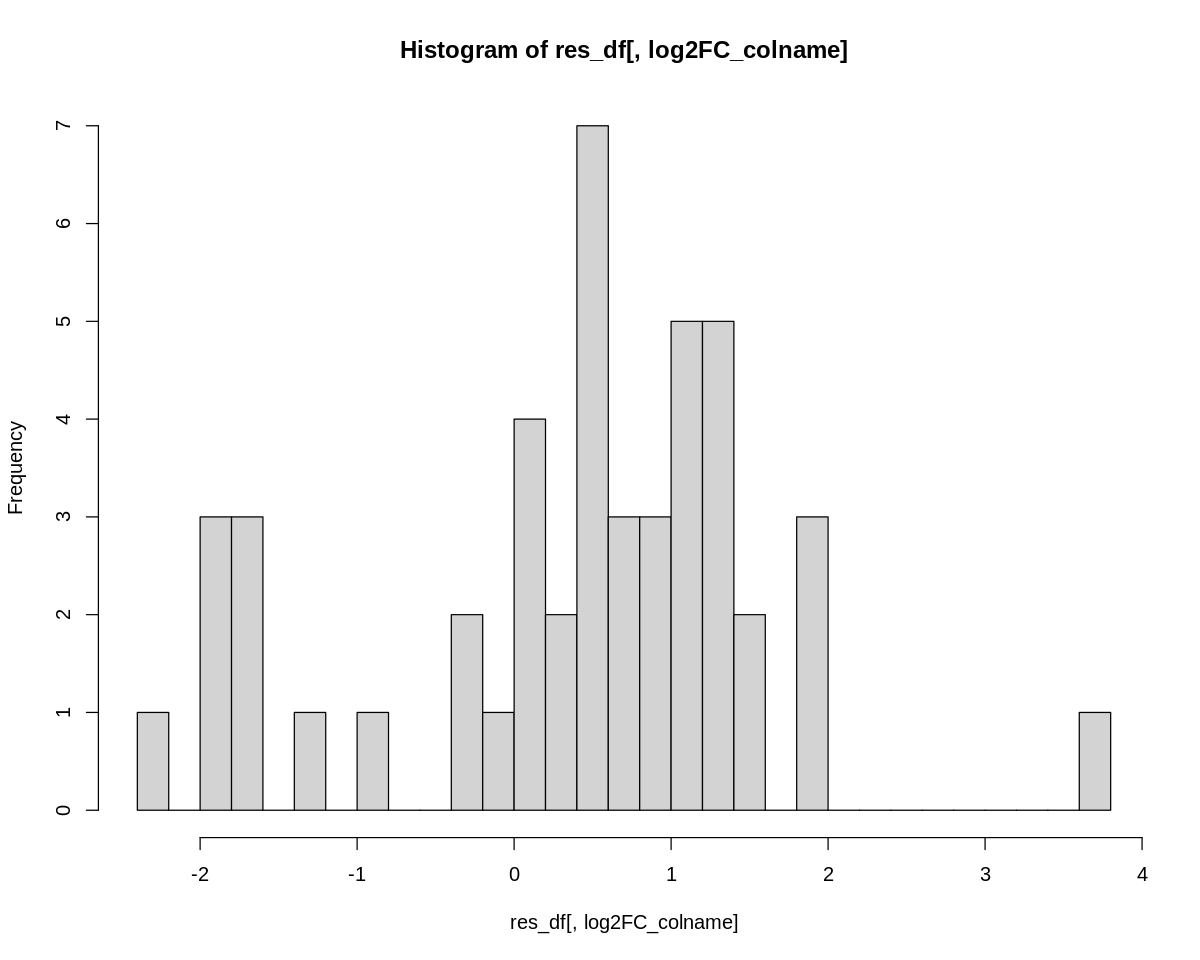

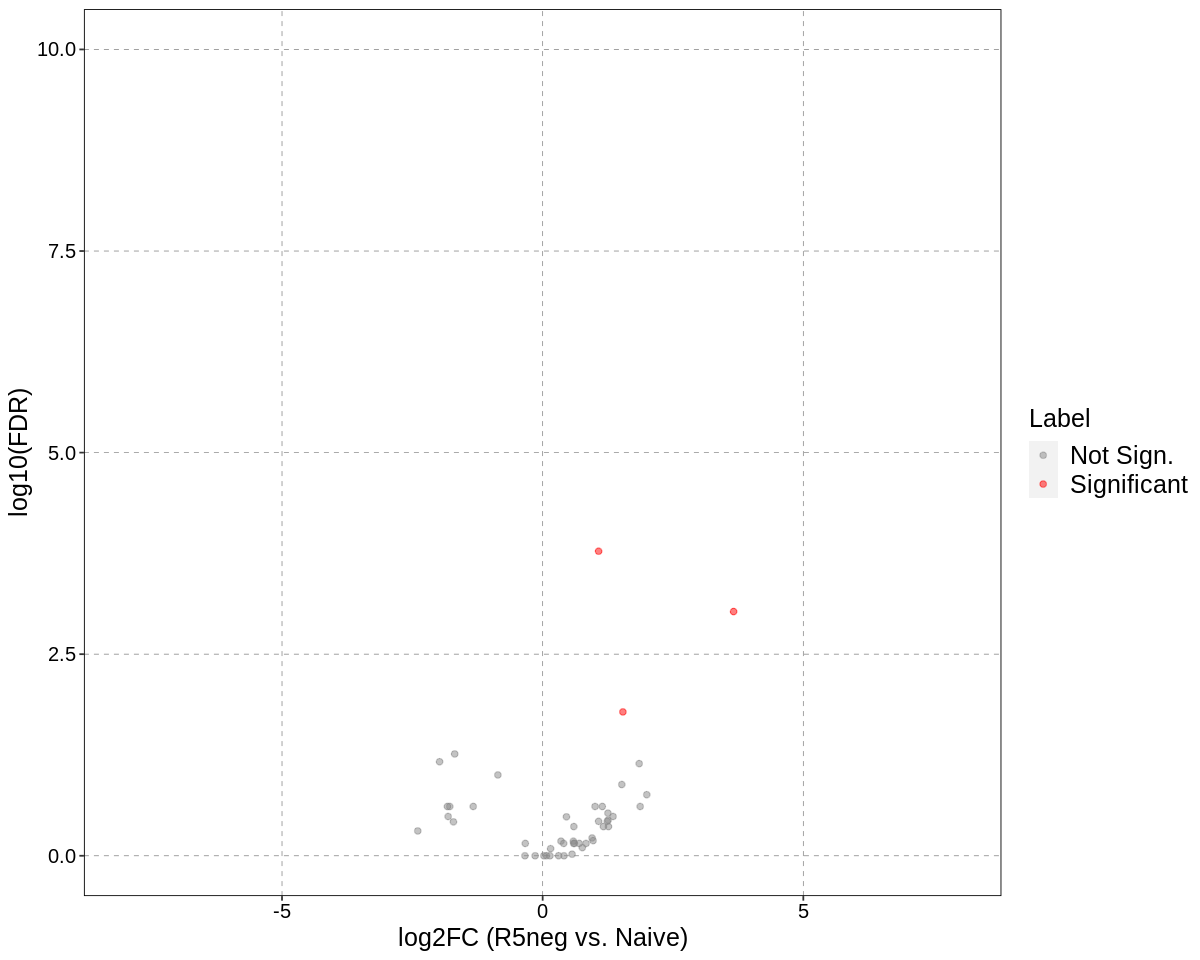

In [64]:
volcano_plot(res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight = FALSE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = contrast,
                show_plot = TRUE)

### with highlight

### select parameters for highlight

In [65]:
res_df$highlight = names(id_annot[match(rownames(res_df),id_annot)]) # find the PS species names

unique(res_df$highlight)

[1] "PS 33:3"      "PS O-36:5"    "LPS 20:3"     "LPS O-19:1;O" "LPS O-15:0;O"
 [6] "LPS 20:0"     "LPS O-28:1;O" "PS O-28:1"    "LPS O-17:0;O" "PS 40:7"     
[11] "PS O-33:1"    "PS 33:0"      "PS O-34:0"    "PS O-42:5"    "PS O-42:4"   
[16] "PS O-42:3"    "PS 41:2"      "PS O-35:3"    "PS O-35:1"    "PS O-34:2"   
[21] "PS O-35:0"    "PS 40:6"      "PS O-36:2"    "PS O-36:1"    "PS O-36:0"   
[26] "PS 44:12"     "PS 34:0"      "PS O-37:3"    "PS 34:5"      "PS O-38:4"   
[31] "PS O-38:3"    "PS O-38:2"    "PS O-38:1"    "PS 36:2"      "PS 35:5"     
[36] "PS 36:1"      "PS 36:6"      "PS 39:7"      "PS 36:4"      "PS O-40:5"   
[41] "PS O-40:4"    "PS 38:5"      "PS O-40:3"    "PS O-40:2"

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”


[1] "range of log10padj: 0.000451955460768076\nrange of log2FC: Inf"
[2] "range of log10padj: 3.77707368710817\nrange of log2FC: -Inf"   
[1] "With highlighted text"


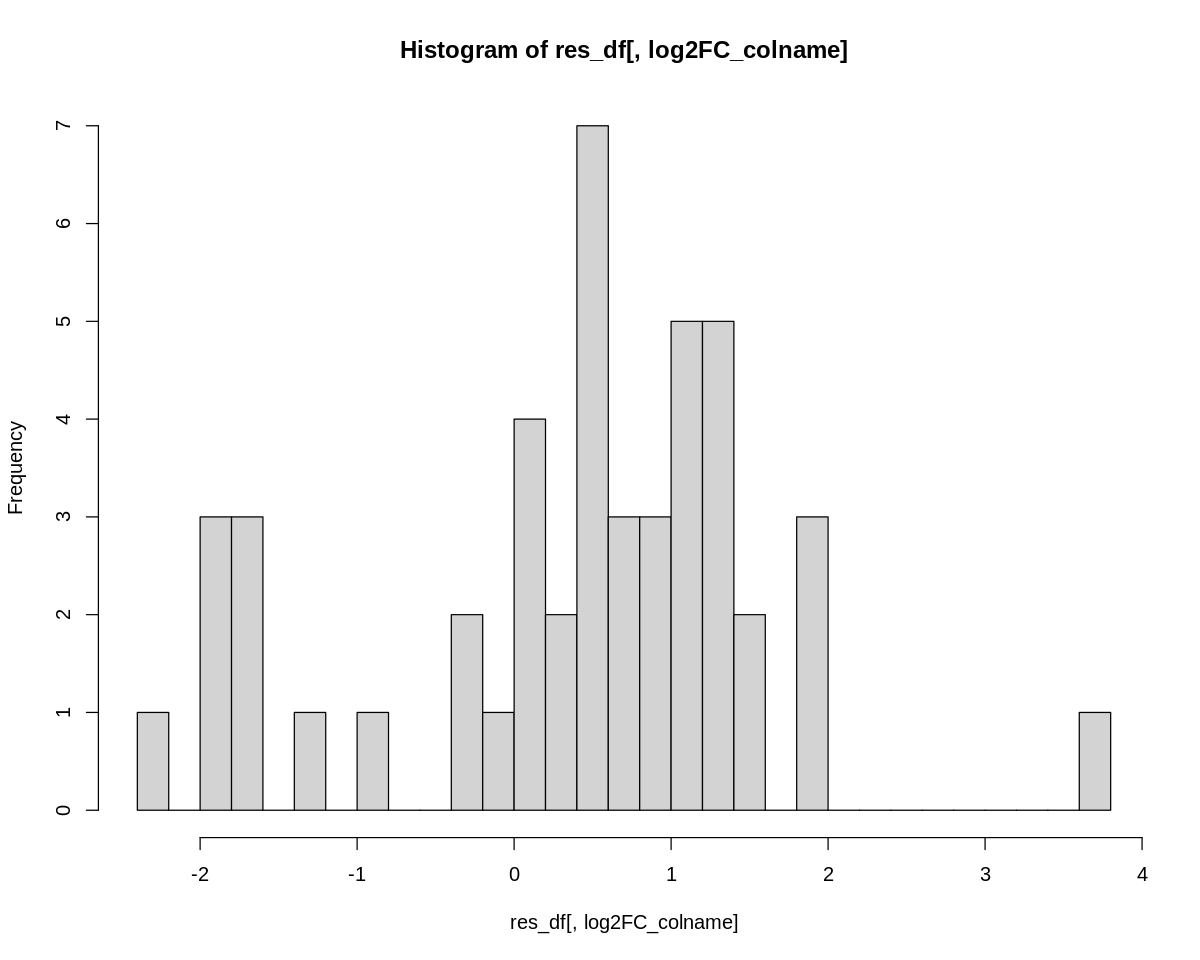

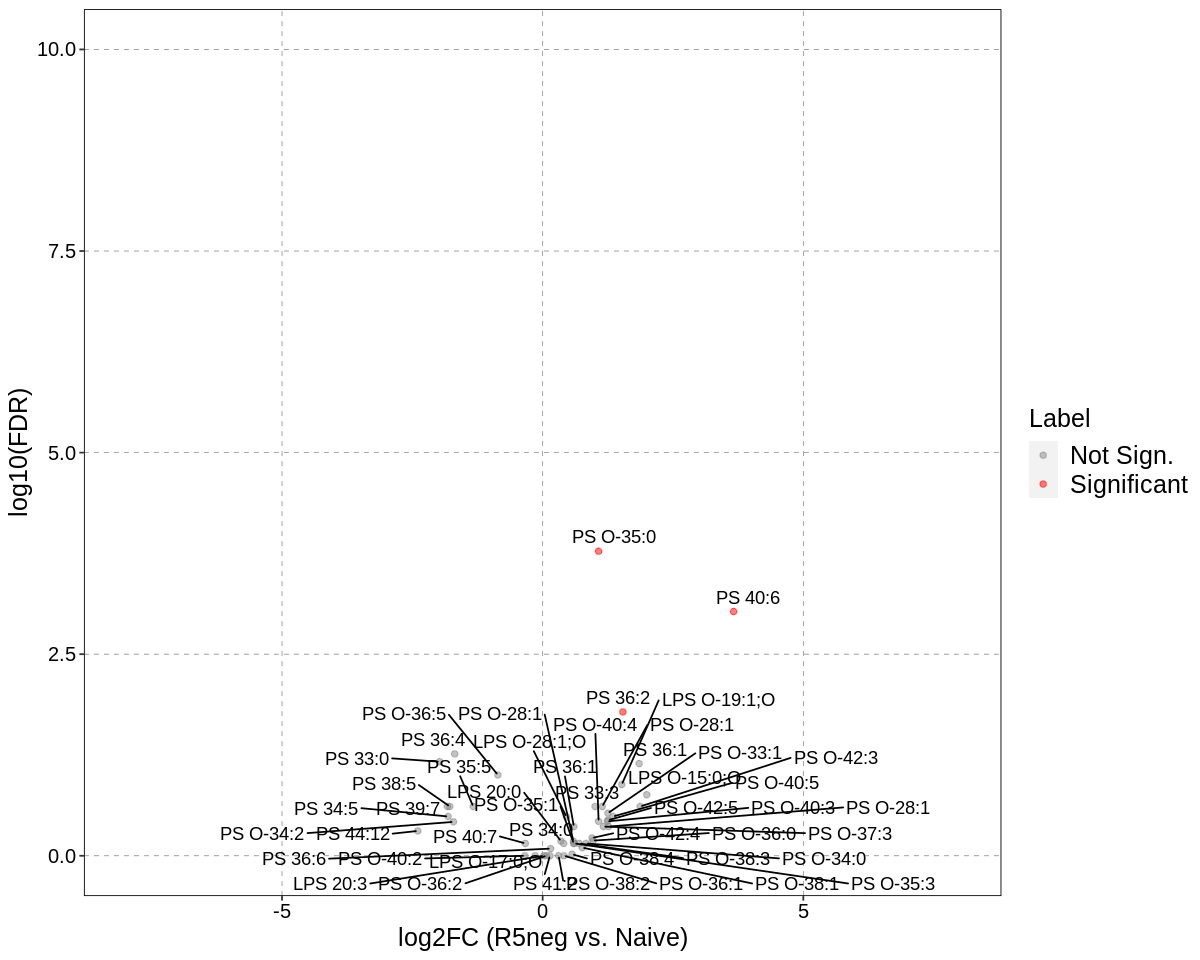

In [66]:
volcano_plot(   res_df = res_df,
                padj_colname = padj_colname,
                log2FC_colname = log2FC_colname,
                p_cut_off = 0.05,
                log2FC_cut_off = 1,
                xlab = glue("log2FC ({contrast})"),
                ylab = 'log10(FDR)',
                xlim = c(-8,8),
                ylim = c(0,10),
                highlight_text = TRUE,
                fig_width = 10,
                fig_height = 8,
                text_size = 12,
                legend_size = 15,
                axis_title_size = 15,
                output_dir = out_dir,
                pdf_prefix = glue('{contrast}_with_highlight{topN}'),
                show_plot = TRUE)